# NYC Public School SAT Performance and Correlations with Demographic Factors

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#NYC-Public-School-SAT-Performance-and-Correlations-with-Demographic-Factors" data-toc-modified-id="NYC-Public-School-SAT-Performance-and-Correlations-with-Demographic-Factors-1">NYC Public School SAT Performance and Correlations with Demographic Factors</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1">Introduction</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-1.1.1">Findings</a></span></li></ul></li><li><span><a href="#Initial-Data-Exploration" data-toc-modified-id="Initial-Data-Exploration-1.2">Initial Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Observations-of-Datasets" data-toc-modified-id="Observations-of-Datasets-1.2.1">Observations of Datasets</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1.3">Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Adding-Key-Datapoints" data-toc-modified-id="Adding-Key-Datapoints-1.3.1">Adding Key Datapoints</a></span></li><li><span><a href="#Condensing-Datasets" data-toc-modified-id="Condensing-Datasets-1.3.2">Condensing Datasets</a></span><ul class="toc-item"><li><span><a href="#class_size" data-toc-modified-id="class_size-1.3.2.1">class_size</a></span></li><li><span><a href="#demographics" data-toc-modified-id="demographics-1.3.2.2">demographics</a></span></li><li><span><a href="#graduation" data-toc-modified-id="graduation-1.3.2.3">graduation</a></span></li><li><span><a href="#ap_2010-Data-Prep" data-toc-modified-id="ap_2010-Data-Prep-1.3.2.4">ap_2010 Data Prep</a></span></li></ul></li></ul></li><li><span><a href="#Merging-the-Datasets" data-toc-modified-id="Merging-the-Datasets-1.4">Merging the Datasets</a></span></li><li><span><a href="#Imputation" data-toc-modified-id="Imputation-1.5">Imputation</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-1.6">Analysis</a></span><ul class="toc-item"><li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-1.6.1">Correlation Analysis</a></span></li><li><span><a href="#Observations-of-sat_score-Correlations" data-toc-modified-id="Observations-of-sat_score-Correlations-1.6.2">Observations of sat_score Correlations</a></span></li><li><span><a href="#Scatter-Plots" data-toc-modified-id="Scatter-Plots-1.6.3">Scatter Plots</a></span><ul class="toc-item"><li><span><a href="#Enrollment" data-toc-modified-id="Enrollment-1.6.3.1">Enrollment</a></span></li><li><span><a href="#Students-Actively-Learning-English" data-toc-modified-id="Students-Actively-Learning-English-1.6.3.2">Students Actively Learning English</a></span></li><li><span><a href="#School-Safety" data-toc-modified-id="School-Safety-1.6.3.3">School Safety</a></span></li><li><span><a href="#Race" data-toc-modified-id="Race-1.6.3.4">Race</a></span></li><li><span><a href="#Gender" data-toc-modified-id="Gender-1.6.3.5">Gender</a></span></li><li><span><a href="#Advanced-Placement-Exams" data-toc-modified-id="Advanced-Placement-Exams-1.6.3.6">Advanced Placement Exams</a></span></li></ul></li></ul></li><li><span><a href="#Combined-Visualizations" data-toc-modified-id="Combined-Visualizations-1.7">Combined Visualizations</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2">Conclusion</a></span></li></ul></div>

## Introduction
In this project we will be exploring a dataset of NYC school SAT scores and associating that data with demographic signals found in other publicly available datasets. Our goal is to uncover whether factors like race, income, gender, etc. may have an unfair impact on test performance.  

New York City makes this data available free online, however, we will need to go through several data validation processes in order to perform our analysis.

Sources: 

* [SAT](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) scores by school - SAT scores for each high school in New York City
* [School](https://data.cityofnewyork.us/Education/School-Attendance-and-Enrollment-Statistics-by-Dis/7z8d-msnt) attendance - Attendance information for each school in New York City
* [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school
* [AP test results](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
* [Graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a) - The percentage of students who graduated and other outcome information
* [Demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j) - Demographic information for each school
* [School survey](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) - Surveys of parents, teachers, and students at each school


**Learning Objective: Utilize advanced Python data cleaning methods to combine, clean, validate, and analyze these datasets**

### Findings

Root cause for correlations

* __SAT Critical Reading Avg. Score__, __SAT Math Avg. Score__, __SAT Writing Avg. Score__ are, unsurprisingly, strongly correlated with __sat_score__
* __total_enrollment__ has a positive correlation with __sat_score__, which is surprising because a previous assumption might be that smaller class sizes would lead to more student attention and therefore higher scores
    * columns similar to __total_enrollment__ correlate
    * **Although we see 0.37 correlation between __sat_score__ and __total_enrollment__, the plot shows that there's not a clear gradient ascent. Rather, we see a large cluster with some lines coming off in different directions. The correlation is likely coming from behavior of points in the cluster. We will extract those values for further examination.**
    * **High enrollment schools are have larger populations of international student where English is not typically the native language of students. This tells us that the correlation between enrollment and sat scores are likely the result of English not being the primary language of HS with low performance, not total enrollment.**
        * When we look at the scatter plot of data of school districts, their percentage of students learning English, and their correlation with those school's mean SAT scores, we can see that there is a loose correlation. As the percentage of students learning English increases, there is a tendency for there to be lower than average SAT performance. One conclusion we might draw is that the SAT test may be easier when you already speak English well, as the test is given in English.
* __female_per__ and __female_num__ correlate positively with __sat_score__, while __male_per__ and __male_num__ correlate negatively
* Perceived school safety correlates with __sat_score__
    * The granularity that we look at school safety and its affect on SAT score impacts what type of information we're able to pull out. At the school level, we see that below a certain level of safety, SAT scores hit a low and stay there, however above a 7 there is a breakout point where SAT scores can increase significantly. The Borough level is too high-level to determine a correlation with Safety and SAT scores, however, we have can see that the boroughs themselves can have mean scores varying 100-200 points. Where the correlation is strongest is at the school district level, where we see perceived school safety correlating with SAT scores.
* Student's perception of academic standards correlates with __sat_score__, however, parent and teacher perceptions of academic standards do not
* Race correlates with __sat_score__
* Percentage of people learning English negatively correlates with __sat_score__

## Initial Data Exploration
We will need to read our data into a dictionary for accessibility.

In [1]:
# read in the datasets
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# do not limit the number of rows shown by default 
pd.set_option('display.max_rows', None)

# create a list of our csv file names
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
# create an empty dictionary we will use to store our dataframes
data = {}

# loop over the file names and save the dataframes that match to the dictionary
for file in data_files:
    # isolate the filename to use as the dictionary key 
    file_name = re.search("([\w.]+)\.csv", file).group(1)
    # save the dataframes as the values and the filename as key in dict
    data[file_name] = pd.read_csv(file)

The most important dataset for our analysis is the one that contains the SAT scores. Let's explore that one first.

In [2]:
print(data['sat_results'].head())

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

In [3]:
# print the first 5 rows of each dataframe in the dictionary
for key in data:
    print("SOURCE: ",key)
    print(data[key].head())
    print("\n")

SOURCE:  ap_2010
      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  


SOURCE:  class_size
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015

### Observations of Datasets

1) DBN appears to be the unique identifier for the high schools  

2) The school names indicate that we are only dealing with high school data 

3) We don't have a cumulative score column for the SAT and we may want to add that 

4) Five of our six dataframes contain a DBN number column. The class_size dataframe has the piececs of encoding that make up the DBN number, meaning we will be able to create a DBN number using the parts.  

5) class_size, demographics, and graduation  dataframes contain multiple occurences of a single DBN number, which will need to be processed into a single line

6) The Location 1 column in the hs_directory dataframe has geomap data that we may be able to use for map overlays 

In [4]:
# read in the text file datasets
d75_survey = pd.read_csv('survey_d75.txt', encoding = 'Windows-1252', delimiter = '\t')
all_survey = pd.read_csv('survey_all.txt', encoding = 'Windows-1252', delimiter = '\t')
# combine the text dataframes
survey = pd.concat([all_survey,d75_survey], axis = 0)

print(survey.head())

      dbn    bn                      schoolname  d75 studentssurveyed  \
0  01M015  M015       P.S. 015 Roberto Clemente    0               No   
1  01M019  M019             P.S. 019 Asher Levy    0               No   
2  01M020  M020            P.S. 020 Anna Silver    0               No   
3  01M034  M034  P.S. 034 Franklin D. Roosevelt    0              Yes   
4  01M063  M063       P.S. 063 William McKinley    0               No   

   highschool                  schooltype  rr_s  rr_t  rr_p  ...  s_q14_2  \
0         0.0           Elementary School   NaN    88    60  ...      NaN   
1         0.0           Elementary School   NaN   100    60  ...      NaN   
2         0.0           Elementary School   NaN    88    73  ...      NaN   
3         0.0  Elementary / Middle School  89.0    73    50  ...      NaN   
4         0.0           Elementary School   NaN   100    60  ...      NaN   

   s_q14_3  s_q14_4  s_q14_5  s_q14_6  s_q14_7  s_q14_8  s_q14_9  s_q14_10  \
0      NaN      NaN 

We now have a single dataframe for our survey responses, however, there is a large amount of columns that we do not need. The [source](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) of the data contains a data dictionary that we can use to narrow down the columns to only those that will answer our resarch question. 

In [5]:
# list of columns we would like to keep
target_survey_columns = ["dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", 
                         "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", 
                         "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", 
                         "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

# filter the dataframe to only keep our targets
survey = survey.loc[:,target_survey_columns]

# rename the dbn column to fit the format of the other datasets
survey = survey.rename(columns = {'dbn':'DBN'})

# add the survey dataframe to our dictionary
data["survey"] = survey

Let's create a DBN column for the class_size dataframe. We can uncover the pattern of the composition by looking at the CSD and School Code columns, which make up the two parts of a DBN. We'll need to make sure that every CSD number contains two digits, and combine the columns together.

In [6]:
# create a function that takes in a number and reformats it if there aren't two digits
def number_format(number):
    number = str(number)
    if len(number) == 1:
        number = '0'+number
    return number

# apply the function to the CSD column
data['class_size']['CSD'] = data['class_size']['CSD'].apply(number_format)

# confirm the CSD column contains two characters
print(data['class_size']['CSD'].value_counts().sort_index())

01     550
02    1985
03     782
04     613
05     570
06     769
07     828
08     960
09    1268
10    1568
11    1175
12     976
13     779
14     720
15     834
16     355
17    1020
18     630
19     795
20     763
21     926
22     749
23     501
24     947
25     804
26     575
27    1158
28     804
29     758
30     778
31    1212
32     459
Name: CSD, dtype: int64


In [7]:
# create the DBN column 
data['class_size']['DBN'] = data['class_size']['CSD'] + data['class_size']['SCHOOL CODE']

# check that our column exists and has the predicted values
print(data['class_size']['DBN'].head())

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object


In [8]:
# reformat the name of the dbn column in hs_directory
data['hs_directory']=data['hs_directory'].rename(columns={'dbn':'DBN'})

## Data Cleaning
### Adding Key Datapoints
Let's now create our cumulative SAT score variable, which will be integral for our analysis.

In [9]:
# apply the to_numeric series function to the dataframe slice to change scores to number
data['sat_results'].iloc[:,-3:] = data['sat_results'].iloc[:,-3:].apply(pd.to_numeric, errors = 'coerce') 

# create sat_score column that is the sum of the SAT scores
data['sat_results']['sat_score'] = data['sat_results'].iloc[:,-3:].sum(axis = 1)
# fill 0 values with np.nan
data['sat_results']['sat_score'] = data['sat_results']['sat_score'].replace(0, np.nan)

print(data['sat_results'].iloc[:,-4:].head())

  SAT Critical Reading Avg. Score SAT Math Avg. Score SAT Writing Avg. Score  \
0                             355                 404                    363   
1                             383                 423                    366   
2                             377                 402                    370   
3                             414                 401                    359   
4                             390                 433                    384   

   sat_score  
0     1122.0  
1     1172.0  
2     1149.0  
3     1174.0  
4     1207.0  


Next let's extract the location data from the hs_directory dataframe.  

In [10]:
# examine the Location 1 series data

print(data['hs_directory']['Location 1'][0])

8 21 Bay 25 Street
Far Rockaway, NY 11691
(40.601989336, -73.762834323)


We will focus on extracting the latitude and longitude data.

In [11]:
# function that will extract lat/long
import re
def extract_coor(loc_str):
    pattern = "(\(.+\))"
    coor = re.findall(pattern, loc_str)
    return coor

# apply the function to the series and save the result to a new column 
data['hs_directory']['coordinates'] = data['hs_directory']['Location 1'].apply(extract_coor)

data['hs_directory']['coordinates'].head()

0    [(40.601989336, -73.762834323)]
1    [(40.593593811, -73.984729232)]
2    [(40.692133704, -73.931503172)]
3     [(40.822303765, -73.85596139)]
4    [(40.773670507, -73.985268558)]
Name: coordinates, dtype: object

In [12]:
# turn the coordinates column's objects in string values
lat_long = data['hs_directory']['coordinates'].apply(str)
# remove the undesirable values
lat_long = lat_long.str.replace('\[\'\(','').str.replace('\)\'\]','').str.split(',')
# turn the series of list objects into a pandas dataframe
lat_long = lat_long.apply(pd.Series)

lat_long.head()

,0,1
0,40.601989336,-73.762834323
1,40.593593811,-73.984729232
2,40.692133704,-73.931503172
3,40.822303765,-73.85596139
4,40.773670507,-73.985268558


In [13]:
# assign the lat long to new columns in our hs_directory dataframe
data['hs_directory']['latitude'] = lat_long[0]
data['hs_directory']['longitude'] = lat_long[1]

# convert lat long to number
data['hs_directory'].loc[:,['latitude','longitude']] = data['hs_directory'].loc[:,['latitude','longitude']].applymap(float)

print(data['hs_directory']['latitude'].dtype)

float64


### Condensing Datasets

class_size, graduation, and demographics dataframes have multiple rows where DBN appears. Before we can merge our datasets, we will need to make sure that DBN only appears once.

#### class_size

In [14]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,01,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,01,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,01,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,01,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,01,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015


We will want to filter out rows that don't fall in the range of a high school class.

In [15]:
# check the unique values of Grade
data['class_size']['GRADE '].value_counts()

09-12      10644
MS Core     4762
0K-09       1384
0K          1237
01          1185
02          1167
03          1143
04          1140
05          1086
06           846
07           778
08           735
09            20
Name: GRADE , dtype: int64

In [16]:
# check the unique values of PROGRAM TYPE
data['class_size']['PROGRAM TYPE'].value_counts()

GEN ED     14545
CTT         7460
SPEC ED     3653
G&T          469
Name: PROGRAM TYPE, dtype: int64

For our analysis we will only target GRADE values with '9-12' and PROGRAM TYPE of 'GEN ED'.

In [17]:
# slice the dataframe to only keep desired values
data['class_size'] = data['class_size'][(data['class_size']['GRADE '] == '09-12') & 
                                        (data['class_size']['PROGRAM TYPE'] == 'GEN ED')]

data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
225,01,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01M292
226,01,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01M292
227,01,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01M292
228,01,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01M292
229,01,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01M292


In [18]:
# unique values of core subjects
data['class_size']['CORE SUBJECT (MS CORE and 9-12 ONLY)'].value_counts(dropna=False)

ENGLISH           1977
SCIENCE           1636
SOCIAL STUDIES    1453
MATH              1447
Name: CORE SUBJECT (MS CORE and 9-12 ONLY), dtype: int64

Rather than computing the class metrics for each type of class, we will opt to take the average of metrics across all classes the school offers.

In [19]:
# import numpy so we can call mean
import numpy as np

# create a groupby object
class_size_groupby = data['class_size'].groupby('DBN')

# take the mean across the aggregate of the groupby object
class_size_groupby = class_size_groupby.agg(np.mean)

# assing the groupby object to the existing dataframe
data['class_size'] = class_size_groupby

# reset the index
data['class_size'].reset_index(inplace=True)

# examine the changes to the dataframe
data['class_size'].head()

,DBN,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,57.6000,2.733333,21.200000,19.40,22.866667,NaN


#### demographics

In [20]:
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


The only column that prevents us from merging this dataset is the schoolyear column. We will target only the 2011-2012 years, which is the most recent demographic pull and align us with the year the SAT data was pulled.

In [21]:
# filter dataset to only 20112012
data['demographics'] = data['demographics'][data['demographics']['schoolyear'] == 20112012]

data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


#### graduation

In [22]:
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1


In [23]:
data['graduation']['Cohort'].value_counts()

2006 Aug    4131
2006        4130
2005        3963
2004        3708
2003        3432
2002        3095
2001        2637
Name: Cohort, dtype: int64

In [24]:
data['graduation']['Demographic'].value_counts()

Total Cohort                   2493
General Education Students     2471
English Proficient Students    2471
Special Education Students     2471
Male                           2412
Black                          2403
Female                         2397
Hispanic                       2385
English Language Learners      2036
Asian                          1780
White                          1777
Name: Demographic, dtype: int64

The Demographic and Cohort columns are preventing us from merging this dataset. The Cohort represents the year and the Demographic represents certain demographic slices, such as race, sex, and language. We will keep the Total Cohort metric, which represents an aggregation of the other signals.

In [25]:
# filter the graduation year
data['graduation'] = data['graduation'][data['graduation']['Cohort'] == '2006']
# filter the demographic column
data['graduation'] = data['graduation'][data['graduation']['Demographic'] == 'Total Cohort']

data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56.0,40,47.6,85.1,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4,91,47.2,86.7,...,22,11.4,21.0,14,7.3,13.3,53,27.5,35,18.1


#### ap_2010 Data Prep

The last thing we can complete before merging our datasets is confirming that the scores in the ap_2010 dataset are numbers.

In [26]:
print(data['ap_2010'].iloc[:,-3:].dtypes)

AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object


## Merging the Datasets

Let's start by evaluating the completeness of each datasets completeness of DBN values. This will help us decide how to merge each together.

In [27]:
# loop through the datasets in the dictionary and print the count of all DBN columns 
dbn_totals = {}
for dictionary in data:   
    dbn_count = data[dictionary]['DBN'].count()
    dbn_totals[dictionary] = dbn_count
    
print(dbn_totals)

{'ap_2010': 258, 'class_size': 583, 'demographics': 1509, 'graduation': 405, 'hs_directory': 435, 'sat_results': 478, 'survey': 1702}


We'll start with ap_2010 and graduation, both of which contain fewer DBN counts than sat_results. We will complete a left join on sat_results, as these datasets add context, but aren't critical to our analysis.

In [28]:
# left join ap_2010 to sat_results
combined = data['sat_results'].merge(data['ap_2010'], how = 'left', on = 'DBN')

# left join graduation to combined dataset
combined = combined.merge(data['graduation'], how = 'left', on = 'DBN')

On the rest of the datasets we will perform inner joins. These other datasets are more complete and are more valuable to our analysis, so we want to aim for completeness.

In [29]:
# inner join class_size to combined
combined = combined.merge(data['class_size'], how = 'inner', on = 'DBN')

# inner join demographics to combined
combined = combined.merge(data['demographics'], how = 'inner', on = 'DBN')

# inner join survey to combined
combined = combined.merge(data['survey'], how = 'inner', on = 'DBN')

# inner join hs_directory to combined
combined = combined.merge(data['hs_directory'], how = 'inner', on = 'DBN')

combined.shape

(363, 164)

We now have fewer total values than the original sat dataset, but since we are looking for high-level correlations, this is acceptable and we will move forward.

## Imputation

In [30]:
# create a object that is composed of each column's mean value
means = combined.mean()

# fill columns that have NA values and a mean for the column with the mean of that column
combined = combined.fillna(means)
# fill columns that have NA values and no mean for the column with 0
combined = combined.fillna(0)

combined.shape

(363, 164)

In [31]:
# save to csv
# combined.to_csv('mydf.csv')

## Analysis

One lense it may be interesting to look at this is performance at the school disctrict level. We will need to create a column of values from the DBN value that represents each school district. 

In [32]:
# create a function that captures the first two characters of a string
def two_string(string):
    first_two = string[:2]
    return first_two

# create a new column that is the result of the application of the function
combined['school_dist'] = combined['DBN'].apply(two_string)

combined['school_dist'].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

### Correlation Analysis

In [33]:
# create an object that is an array of correlations
correlations = combined.corr()
# keep only correlations with sat_score
correlations = correlations['sat_score']
# sort values and print 
print(correlations.sort_values(ascending=False))

sat_score                               1.000000
SAT Writing Avg. Score                  0.987771
SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
Advanced Regents - % of cohort          0.771566
Advanced Regents - % of grads           0.739927
Total Regents - % of cohort             0.667603
white_per                               0.620718
Total Grads - % of cohort               0.584234
asian_per                               0.570730
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Total Regents - % of grads              0.494732
asian_num                               0.475445
Number of Exams with scores 3 4 or 5    0.463245
white_num                               0.449559
N_s                                     0.423463
N_p                                     0.421530
total_students                          0.407827
NUMBER OF STUDENTS / SEATS FILLED       0.394626
female_num          

### Observations of sat_score Correlations

* __SAT Critical Reading Avg. Score__, __SAT Math Avg. Score__, __SAT Writing Avg. Score__ are, unsurprisingly, strongly correlated with __sat_score__
* __total_enrollment__ has a positive correlation with __sat_score__, which is surprising because a previous assumption might be that smaller class sizes would lead to more student attention and therefore higher scores
    * similar columns to __total_enrollment__ correlate similarly
* __female_per__ and __female_num__ correlate positively with __sat_score__, while __male_per__ and __male_num__ correlate negatively
* Perceived school safety correlates with __sat_score__
* Student's perception of academic standards correlates with __sat_score__, however, parent and teacher perceptions of academic standards do not
* Race correlates with __sat_score__
* Percentage of people learning English negatively correlates with __sat_score__

### Scatter Plots

#### Enrollment 

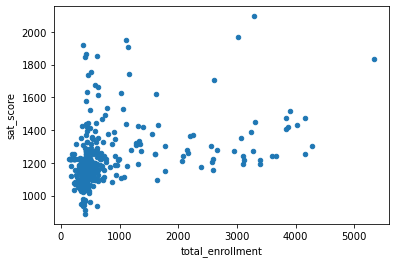

In [34]:
combined.plot.scatter(x = "total_enrollment", y = "sat_score")
plt.show()

Although we see 0.37 correlation between __sat_score__ and __total_enrollment__, the plot shows that there's not a clear gradient ascent. Rather, we see a large cluster with some lines coming off in different directions. The correlation is likely coming from behavior of points in the cluster. We will extract those values for further examination.

In [35]:
# filter the combined dataset 
low_enrollment = combined[(combined['sat_score'] < 1000) & (combined['total_enrollment'] < 1000)]
low_enrollment['School Name']

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

The above schools are primarily schools that cater to the international community where English is not typically the native language of students. This tells us that the correlation between enrollment and sat scores are likely the result of English not being the primary language of HS with low performance, not total enrollment.

#### Students Actively Learning English

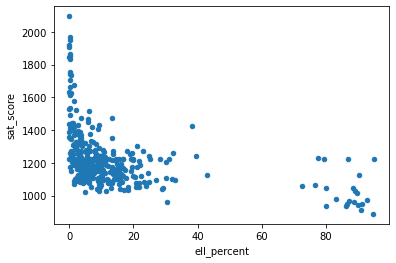

In [36]:
# plot ell_percent vs sat_score 
combined.plot.scatter(x = "ell_percent", y = "sat_score")
plt.show()

There's a clearer trend here, however, the data may tell a better story if it's aggregated across school districts. 

In [37]:
# aggregate the combined dataset by school_dist over the mean
districts = combined.groupby('school_dist').agg(np.mean)
districts.reset_index(inplace = True)
# create an array of correlations
dis_corr = districts.corr()
# print the district level correlations with SAT
print(dis_corr['sat_score'].sort_values(ascending = False))

sat_score                               1.000000
SAT Writing Avg. Score                  0.991277
SAT Critical Reading Avg. Score         0.990202
SAT Math Avg. Score                     0.982490
Advanced Regents - % of cohort          0.888869
Total Regents - % of cohort             0.878937
Advanced Regents - % of grads           0.873636
Total Regents - % of grads              0.811658
N_s                                     0.794514
white_per                               0.772859
Total Grads - % of cohort               0.758658
AP Test Takers                          0.757073
female_num                              0.756242
N_p                                     0.753578
asian_per                               0.750561
Total Exams Taken                       0.744588
NUMBER OF STUDENTS / SEATS FILLED       0.737972
total_students                          0.735115
NUMBER OF SECTIONS                      0.732814
total_enrollment                        0.715473
white_num           

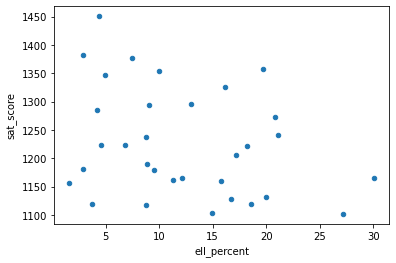

In [38]:
districts.plot.scatter(x = "ell_percent", y = "sat_score")
plt.show()

When we look at the scatter plot of data of school districts, their percentage of students learning English, and their correlation with those school's mean SAT scores, we can see that there is a loose correlation. As the percentage of students learning English increases, there is a tendency for there to be lower than average SAT performance. One conclusion we might draw is that the SAT test may be easier when you aalready speak English well, as the test is given in English.

* __SAT Critical Reading Avg. Score__, __SAT Math Avg. Score__, __SAT Writing Avg. Score__ are, unsurprisingly, strongly correlated with __sat_score__
* __total_enrollment__ has a positive correlation with __sat_score__, which is surprising because a previous assumption might be that smaller class sizes would lead to more student attention and therefore higher scores
    * similar columns to __total_enrollment__ correlate similarly
    * **Although we see 0.37 correlation between __sat_score__ and __total_enrollment__, the plot shows that there's not a clear gradient ascent. Rather, we see a large cluster with some lines coming off in different directions. The correlation is likely coming from behavior of points in the cluster. We will extract those values for further examination.**
    * **The above schools are primarily schools that cater to the international community where English is not typically the native language of students. This tells us that the correlation between enrollment and sat scores are likely the result of English not being the primary language of HS with low performance, not total enrollment.**
        * When we look at the scatter plot of data of school districts, their percentage of students learning English, and their correlation with those school's mean SAT scores, we can see that there is a loose correlation. As the percentage of students learning English increases, there is a tendency for there to be lower than average SAT performance. One conclusion we might draw is that the SAT test may be easier when you aalready speak English well, as the test is given in English.
* __female_per__ and __female_num__ correlate positively with __sat_score__, while __male_per__ and __male_num__ correlate negatively
* Perceived school safety correlates with __sat_score__
* Student's perception of academic standards correlates with __sat_score__, however, parent and teacher perceptions of academic standards do not
* Race correlates with __sat_score__
* Percentage of people learning English negatively correlates with __sat_score__

#### School Safety

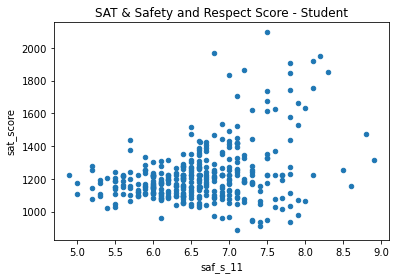

In [39]:
combined.plot.scatter(x = "saf_s_11", y = "sat_score", title = 'SAT & Safety and Respect Score - Student')
plt.show()

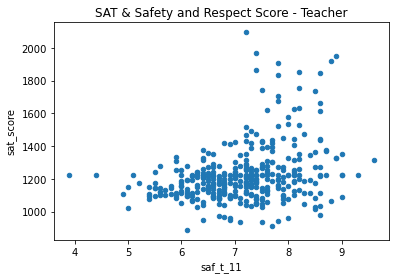

In [40]:
combined.plot.scatter(x = 'saf_t_11', y = 'sat_score', title = 'SAT & Safety and Respect Score - Teacher')
plt.show()

In [41]:
# create a combined safety score of teacher and student scores for a school
combined['overall_safety'] = (combined['saf_t_11'] + combined['saf_s_11']) / 2

# group by borough and take the mean
boroughs = combined.groupby('borough').agg(np.mean)
boroughs.reset_index(inplace = True)
# print array of overall safety sat and borough
borough_safety = boroughs.loc[:,['borough','overall_safety', 'sat_score']]
print(borough_safety)

         borough  overall_safety    sat_score
0          Bronx        6.816729  1157.598203
1       Brooklyn        6.678302  1181.364461
2      Manhattan        7.059574  1278.331410
3         Queens        7.043750  1286.753032
4  Staten Island        6.870000  1382.500000


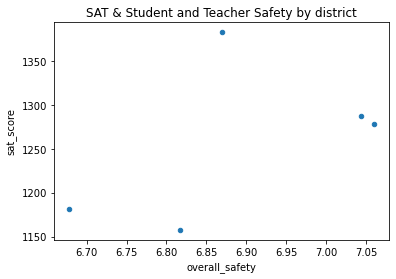

In [42]:
# scatterplot at the borough level between overall safety and sat_score
boroughs.plot.scatter(x = 'overall_safety', y = 'sat_score', title = 'SAT & Student and Teacher Safety by district')
plt.show()

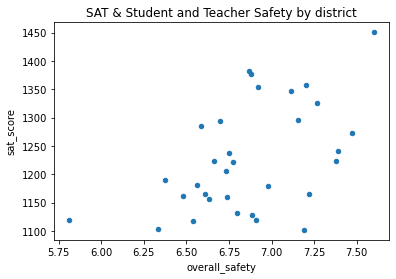

In [43]:
# create a combined safety score at the districts level
districts['overall_safety'] = (districts['saf_t_11'] + districts['saf_s_11']) / 2

# scatterplot at the district level between overall safety and sat_score
districts.plot.scatter(x = 'overall_safety', y = 'sat_score', title = 'SAT & Student and Teacher Safety by district')
plt.show()

The granularity that we look at school safety and its affect on SAT score impacts what type of information we're able to pull out. At the school level, we see that below a certain level of safety, SAT scores hit a low and stay there, however above a 7 there is a breakout point where SAT scores can increase significantly. The Borough level is too high-level to determine a correlation with Safety and SAT scores, however, we have can see that the boroughs themselves can have mean scores varying 100-200 points. Where the correlation is strongest is at the school district level, where we see perceived school safety correlating with SAT scores.

#### Race

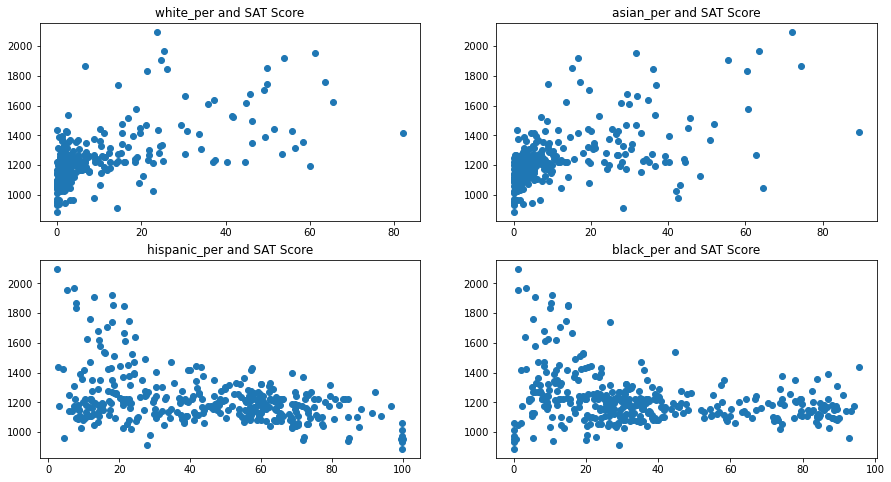

In [44]:
# create a list that contains each race percentage
race_perc = ['white_per', 'asian_per', 'hispanic_per', 'black_per']
plt.figure(figsize = (15,8))
for i, race in zip(range(1,5), race_perc):
    plt.subplot(2,2,i)
    plt.scatter(x = combined[race], y = combined['sat_score'])
    plt.title('{} and SAT Score'.format(race))
plt.show()

There is a positive correlation between SAT score and percentage white and asian student, and a negative correlation between percentage black and hispanic students.

In [45]:
high_his = combined[(combined['hispanic_per'] >95)]
high_his.loc[:,('School Name', 'hispanic_per', 'sat_score', 'ell_percent')]

,School Name,hispanic_per,sat_score,ell_percent
44,MANHATTAN BRIDGES HIGH SCHOOL,99.8,1058.0,72.6
82,0,96.7,1174.0,19.6
89,GREGORIO LUPERON HIGH SCHOOL FOR SCIE,99.8,1014.0,89.6
125,0,99.4,951.0,86.6
141,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,99.8,934.0,79.9
176,0,99.8,970.0,92.9
253,MULTICULTURAL HIGH SCHOOL,99.8,887.0,94.6
286,PAN AMERICAN INTERNATIONAL HIGH SCHOO,100.0,951.0,91.3


Schools with over 95% hispanic students are those which cater to hispanic immigrants and have a high amount of students learning English. A conclusion we might draw is that the correlation with race and SAT may really be a result of not being in the American education system for a long period of time, and not being fluent English speakers. 

In [46]:
low_his_high_sat = combined[(combined['hispanic_per'] < 10) & (combined['sat_score'] > 1800)]
low_his_high_sat.loc[:,('School Name', 'white_per', 'asian_per','sat_score','ell_percent')]

,School Name,white_per,asian_per,sat_score,ell_percent
37,STUYVESANT HIGH SCHOOL,23.7,72.1,2096.0,0.0
151,BRONX HIGH SCHOOL OF SCIENCE,25.4,63.5,1969.0,0.1
187,BROOKLYN TECHNICAL HIGH SCHOOL,21.3,60.3,1833.0,0.1
327,QUEENS HIGH SCHOOL FOR THE SCIENCES A,6.7,74.4,1868.0,0.2
356,STATEN ISLAND TECHNICAL HIGH SCHOOL,61.3,31.8,1953.0,0.1


Looking at schools that have SAT scores over 1800 and a low population of Hispanics, we see that the schools are accelerated College Prep and specialty math and sciences schools. Further, these schools have a high population of asian and white students, and nearly everyone in attendance are fluent English speakers.

#### Gender

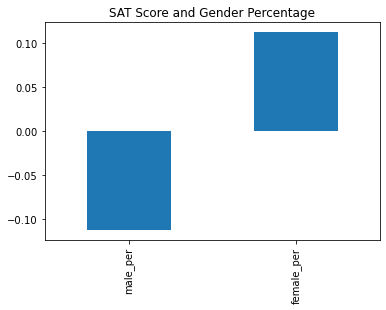

In [47]:
gender_fields = ['male_per','female_per']
correlations[gender_fields].plot(kind='bar', title = 'SAT Score and Gender Percentage')
plt.show()

The chart above indicates that there could be a correlation between gender and SAT, however, a Pearson's r of at least .3 is considered notable. Neither of these values meet a significant enough correlation to make a judgement on the influence of gender on SAT scores. It may be beneficial, however, to look at schools that cater to a specific gender and look at SAT scores.

In [48]:
high_fem = combined[(combined['female_per'] > 60) & (combined['sat_score'] > 1700)]

high_fem.loc[:,('School Name', 'female_per', 'sat_score', 'borough')]

,School Name,female_per,sat_score,borough
5,BARD HIGH SCHOOL EARLY COLLEGE,68.7,1856.0,Manhattan
26,ELEANOR ROOSEVELT HIGH SCHOOL,67.5,1758.0,Manhattan
60,BEACON HIGH SCHOOL,61.0,1744.0,Manhattan
61,FIORELLO H. LAGUARDIA HIGH SCHOOL OF,73.6,1707.0,Manhattan
302,TOWNSEND HARRIS HIGH SCHOOL,71.1,1910.0,Queens


None of the schools that have a high density of female students and a SAT scores over 1700 cater only to female students. There is a tendency for these schools to be located in Manhattan, though the reason for this is unclear.

#### Advanced Placement Exams

In the U.S., high school students take Advanced Placement (AP) exams to earn college credit. It makes sense that the number of students at a school who took AP exams would be highly correlated with the school's SAT scores. Let's explore this.

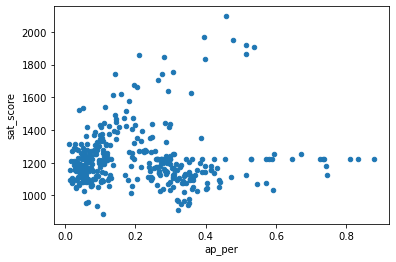

In [49]:
# create a column that shows us the % of students at a school taking the AP exams
combined['ap_per'] = combined['AP Test Takers '] / combined['total_enrollment']

combined.plot.scatter(x = 'ap_per', y = 'sat_score')
plt.show()

The scatter plot shows that there is not a strong relationship between the percentage of students who take AP Exams at a school and how the school performs on the SAT exam. 

## Combined Visualizations

In [50]:
# create a dataframe of our target data for simplicity
viz_data = combined.loc[:,['borough', 'school_dist','overall_safety','sat_score', 'white_per','asian_per', 'hispanic_per','black_per']]
viz_data.head()

,borough,school_dist,overall_safety,sat_score,white_per,asian_per,hispanic_per,black_per
0,Manhattan,01,6.150000,1122.0,1.7,14.0,53.8,29.1
1,Manhattan,01,6.300000,1172.0,2.3,29.2,45.9,22.6
2,Manhattan,01,6.955833,1149.0,10.4,9.7,55.4,23.9
3,Manhattan,01,6.400000,1207.0,1.6,9.3,56.9,31.6
4,Manhattan,01,7.450000,1621.0,44.9,27.8,14.2,11.7


In [51]:
def safety_rating(rating):
    if rating < 6:
        return 'Unsafe' 
    elif rating < 7:
        return 'Somewhat Unsafe'
    elif rating < 8:
        return 'Somewhat Safe'
    else :
        return 'Safe'
    
viz_data['safety_rating'] = viz_data['overall_safety'].apply(safety_rating)

borough_list = list(viz_data['borough'].unique())
color_list = ['red', 'yellow', 'blue', 'green', 'white']

# create a list that contains each race percentage
race_perc = ['white_per', 'asian_per', 'hispanic_per', 'black_per']

borough_list = list(viz_data['borough'].unique())
shape_list = ['.', '*', 's', 'P', 'v']
borough_shape_dict = {}
for b, shape in zip(borough_list, shape_list):
    borough_shape_dict[b] = shape
print(borough_shape_dict)

def b_shape(bor):
    sh = borough_shape_dict[bor]
    return sh

viz_data['shape'] = viz_data['borough'].apply(b_shape)
print(viz_data['shape'].unique())

{'Manhattan': '.', 'Bronx': '*', 'Brooklyn': 's', 'Queens': 'P', 'Staten Island': 'v'}
['.' '*' 's' 'P' 'v']


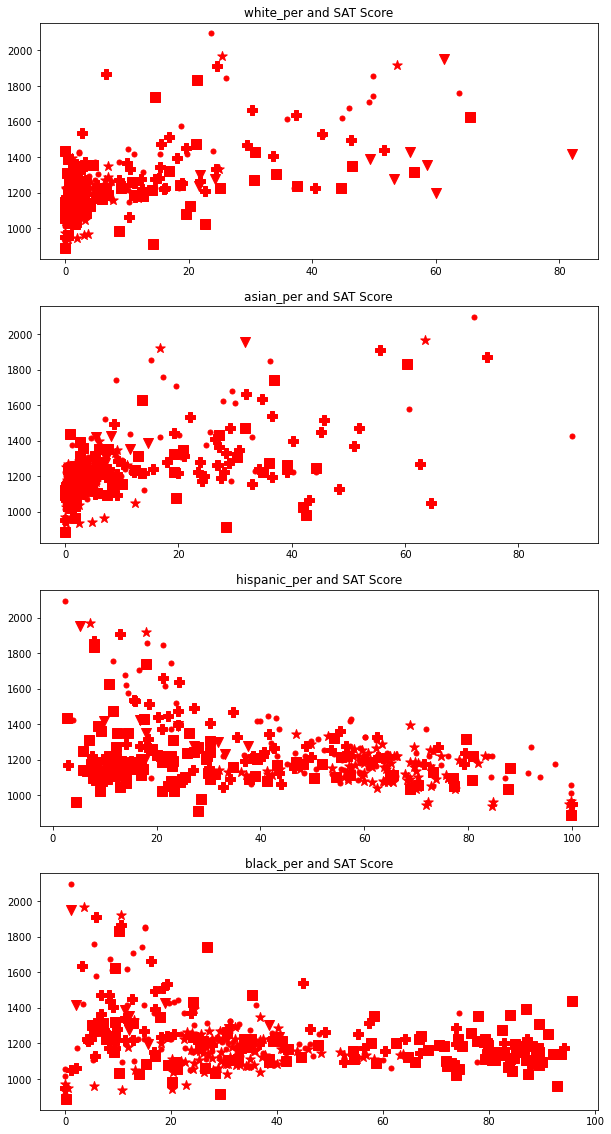

In [52]:
plt.figure(figsize = (10,20))

#ax.scatter(x = viz_data['school_dist'], y = viz_data['sat_score'])
for i, race in zip(range(1,5), race_perc):
    plt.subplot(4,1,i)
    for boro, sh in zip(borough_list,shape_list):
        plt.scatter(x = viz_data[viz_data['borough'] == boro][race], 
                  y = viz_data[viz_data['borough'] == boro]['sat_score'],
                   marker = sh, s = 100, color = 'red')
    plt.title('{} and SAT Score'.format(race))
#    ax.set_xticks([0,.50,1.00])
plt.show()

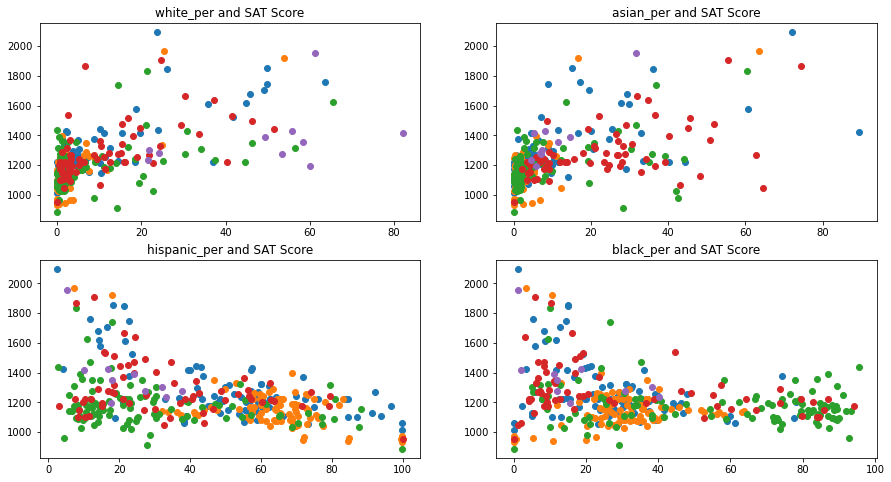

In [53]:
plt.figure(figsize = (15,8))
for i, race in zip(range(1,5), race_perc):
    plt.subplot(2,2,i)
    for boro in borough_list:
        plt.scatter(x = viz_data[viz_data['borough'] == boro][race], y = viz_data[viz_data['borough'] == boro]['sat_score'], label = boro)
    plt.title('{} and SAT Score'.format(race))
plt.show()

# Conclusion

* __SAT Critical Reading Avg. Score__, __SAT Math Avg. Score__, __SAT Writing Avg. Score__ are, unsurprisingly, strongly correlated with __sat_score__
* __total_enrollment__ has a positive correlation with __sat_score__, which is surprising because a previous assumption might be that smaller class sizes would lead to more student attention and therefore higher scores
    * columns similar to __total_enrollment__ correlate
    * **Although we see 0.37 correlation between __sat_score__ and __total_enrollment__, the plot shows that there's not a clear gradient ascent. Rather, we see a large cluster with some lines coming off in different directions. The correlation is likely coming from behavior of points in the cluster. We will extract those values for further examination.**
    * **High enrollment schools are have larger populations of international student where English is not typically the native language of students. This tells us that the correlation between enrollment and sat scores are likely the result of English not being the primary language of HS with low performance, not total enrollment.**
        * When we look at the scatter plot of data of school districts, their percentage of students learning English, and their correlation with those school's mean SAT scores, we can see that there is a loose correlation. As the percentage of students learning English increases, there is a tendency for there to be lower than average SAT performance. One conclusion we might draw is that the SAT test may be easier when you already speak English well, as the test is given in English.
* __female_per__ and __female_num__ correlate positively with __sat_score__, while __male_per__ and __male_num__ correlate negatively
* Perceived school safety correlates with __sat_score__
    * The granularity that we look at school safety and its affect on SAT score impacts what type of information we're able to pull out. At the school level, we see that below a certain level of safety, SAT scores hit a low and stay there, however above a 7 there is a breakout point where SAT scores can increase significantly. The Borough level is too high-level to determine a correlation with Safety and SAT scores, however, we have can see that the boroughs themselves can have mean scores varying 100-200 points. Where the correlation is strongest is at the school district level, where we see perceived school safety correlating with SAT scores.
* Student's perception of academic standards correlates with __sat_score__, however, parent and teacher perceptions of academic standards do not
* Race correlates with __sat_score__
* Percentage of people learning English negatively correlates with __sat_score__